ECS308: Data Science and Machine Learning Project | Akanksha Singh, 19022
    

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_csv('dataset.csv')
df

Unnamed: 0        ID Case Number                    Date  \
0         2015825   2508182    HH781001  11/15/2002 12:30:00 PM   
1         2110300   2687361    HJ308830  04/18/2003 06:10:00 PM   
2          381828  10755691    HZ518320  11/16/2016 09:50:00 PM   
3         6048052   8740111    HV415603  08/04/2012 05:15:00 PM   
4         6873402  11924187    JC549979  12/16/2019 04:45:00 PM   
...           ...       ...         ...                     ...   
99995     3562445   4714376    HM318809  04/21/2006 12:01:00 AM   
99996     4621702   6567536    HP637109  10/19/2008 10:05:00 PM   
99997     5483697   7815219    HS625058  11/20/2010 04:50:00 PM   
99998     3616848   4921843    HM536277  08/12/2006 05:29:00 PM   
99999     4558204   6401168    HP484827  07/30/2008 10:00:00 PM   

                       Block  IUCR       Primary Type  \
0        003XX N ASHLAND AVE  0810              THEFT   
1            016XX W 18TH ST  0486            BATTERY   
2         009XX S CICERO AVE  1506       PROSTITUTION   
3      072XX S INGLESIDE AVE  0460            BATTERY   
4          017XX W THOME AVE  1310    CRIMINAL DAMAGE   
...                      ...   ...                ...   
99995  022XX S WENTWORTH AVE  1310    CRIMINAL DAMAGE   
99996      002XX W CERMAK RD  1360  CRIMINAL TRESPASS   
99997       0000X N STATE ST  0860              THEFT   
99998   032XX W ROOSEVELT RD  0530            ASSAULT   
99999    026XX W POTOMAC AVE  0486            BATTERY   

                         Description Location Description  Arrest  ...  Ward  \
0                          OVER $500               STREET   False  ...  27.0   
1            DOMESTIC BATTERY SIMPLE             SIDEWALK   False  ...  25.0   
2              SOLICIT ON PUBLIC WAY               STREET    True  ...  24.0   
3                             SIMPLE                OTHER   False  ...   5.0   
4                        TO PROPERTY            APARTMENT   False  ...  40.0   
...                              ...                  ...     ...  ...   ...   
99995                    TO PROPERTY           RESTAURANT   False  ...  25.0   
99996                     TO VEHICLE                ALLEY    True  ...  25.0   
99997                   RETAIL THEFT     DEPARTMENT STORE    True  ...  42.0   
99998  AGGRAVATED: OTHER DANG WEAPON                ALLEY    True  ...  24.0   
99999        DOMESTIC BATTERY SIMPLE            APARTMENT   False  ...  26.0   

       Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0                28.0        06     1165667.0     1902638.0  2002   
1                31.0       08B     1165650.0     1891466.0  2003   
2                25.0        16     1144531.0     1895566.0  2016   
3                69.0       08B     1183801.0     1857416.0  2012   
4                77.0        14     1163394.0     1941667.0  2019   
...               ...       ...           ...           ...   ...   
99995            34.0        14     1175327.0     1889358.0  2006   
99996            34.0        26     1175002.0     1889741.0  2008   
99997            32.0        06     1176362.0     1900577.0  2010   
99998            29.0       04A     1154766.0     1894523.0  2006   
99999            24.0       08B     1158631.0     1908547.0  2008   

                   Updated On   Latitude  Longitude  \
0      02/28/2018 03:56:25 PM  41.888430 -87.667064   
1      02/10/2018 03:50:01 PM  41.857773 -87.667445   
2      02/10/2018 03:50:01 PM  41.869447 -87.744861   
3      02/04/2016 06:33:39 AM  41.763932 -87.601884   
4      12/23/2019 03:56:38 PM  41.995575 -87.674309   
...                       ...        ...        ...   
99995  02/10/2018 03:50:01 PM  41.851777 -87.631988   
99996  02/28/2018 03:56:25 PM  41.852835 -87.633169   
99997  02/10/2018 03:50:01 PM  41.882540 -87.627851   
99998  02/28/2018 03:56:25 PM  41.866387 -87.707314   
99999  02/28/2018 03:56:25 PM  41.904791 -87.692741   

                            Location  
0      (41.888429628, -87.6

In [3]:
df = df.drop(['Latitude', 'Longitude'], axis = 1) #redundant feature, already used in location

In [14]:
df = df.astype({"Unnamed: 0": object})
df = df.astype({"ID": object})
df = df.astype({"Beat": object})
df = df.astype({"District": object})
df = df.astype({"Ward": object})
df = df.astype({"Community Area": object})
df = df.astype({"Year": object})
df = df.astype({"X Coordinate": object})
df = df.astype({"Y Coordinate": object})

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2002-11-15 12:30:00 to 2008-07-30 22:00:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            100000 non-null  object        
 1   ID                    100000 non-null  object        
 2   Case Number           100000 non-null  object        
 3   Date                  100000 non-null  datetime64[ns]
 4   Block                 100000 non-null  object        
 5   IUCR                  100000 non-null  object        
 6   Primary Type          100000 non-null  object        
 7   Description           100000 non-null  object        
 8   Location Description  100000 non-null  object        
 9   Arrest                100000 non-null  bool          
 10  Domestic              100000 non-null  bool          
 11  Beat                  100000 non-null  object        
 12  District              10

# 3.1. Feature Selection

## 3.1.1 Entropy

In [17]:
def entropy(y):
    probs = [] # Probabilities of each class label
    for c in set(y): # Set gets a unique set of values. We're iterating over each value
        num_same_class = sum(y == c)  # Remember that true == 1, so we can sum.
        p = num_same_class / len(y) # Probability of this class label
        probs.append(p)
    return sum(-p * np.log2(p) for p in probs)

In [18]:
columns = ['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Location']

"""This code takes too long to execute. So, the result has been appended as a column "Entropy" in df_ent

#Code:
for column in columns:
    print(entropy(df[column]))
    df_ent.append(entropy(df[column]))

"""

'This code takes too long to execute. So, the result has been appended as a column "Entropy" in df_ent\n\n#Code:\nfor column in columns:\n    print(entropy(df[column]))\n    df_ent.append(entropy(df[column]))\n\n'

In [19]:
df_ent = pd.DataFrame()
df_ent["Features"] = columns
df_ent["Entropy"] = [16.60964047441802, 16.60964047441802, 16.60964047441802, 16.50325437354276, 
                     13.842338152132987, 5.6494058088293935, 3.482725829513007, 5.518046958190912,4.0556159613837135,
                     0.839130421235637,0.5773624295265078,8.0915039193288,4.403738721836829,5.475453895970417,
                     5.826020205215316,3.5574293236120447,14.760131667723728,15.11747552923421,4.239196753831807,
                     2.8553923756999566,15.74133241017893]

df_ent

Features    Entropy
0             Unnamed: 0  16.609640
1                     ID  16.609640
2            Case Number  16.609640
3                   Date  16.503254
4                  Block  13.842338
5                   IUCR   5.649406
6           Primary Type   3.482726
7            Description   5.518047
8   Location Description   4.055616
9                 Arrest   0.839130
10              Domestic   0.577362
11                  Beat   8.091504
12              District   4.403739
13                  Ward   5.475454
14        Community Area   5.826020
15              FBI Code   3.557429
16          X Coordinate  14.760132
17          Y Coordinate  15.117476
18                  Year   4.239197
19            Updated On   2.855392
20              Location  15.741332

In [20]:
#Dropping high entropy features(Entropy > 10)

df_drop = df.drop(columns =['Unnamed: 0', 'ID', 'Case Number', 'Date', 
                        'Block', 'X Coordinate', 'Y Coordinate', 'Location'])

df_drop.reset_index(drop = True)

IUCR       Primary Type                    Description  \
0      0810              THEFT                      OVER $500   
1      0486            BATTERY        DOMESTIC BATTERY SIMPLE   
2      1506       PROSTITUTION          SOLICIT ON PUBLIC WAY   
3      0460            BATTERY                         SIMPLE   
4      1310    CRIMINAL DAMAGE                    TO PROPERTY   
...     ...                ...                            ...   
99995  1310    CRIMINAL DAMAGE                    TO PROPERTY   
99996  1360  CRIMINAL TRESPASS                     TO VEHICLE   
99997  0860              THEFT                   RETAIL THEFT   
99998  0530            ASSAULT  AGGRAVATED: OTHER DANG WEAPON   
99999  0486            BATTERY        DOMESTIC BATTERY SIMPLE   

      Location Description  Arrest  Domestic  Beat District  Ward  \
0                   STREET   False     False  1333     12.0  27.0   
1                 SIDEWALK   False      True  1222     12.0  25.0   
2                   STREET    True     False  1131     11.0  24.0   
3                    OTHER   False     False   324      3.0   5.0   
4                APARTMENT   False     False  2433     24.0  40.0   
...                    ...     ...       ...   ...      ...   ...   
99995           RESTAURANT   False     False  2111      9.0  25.0   
99996                ALLEY    True     False  2111      9.0  25.0   
99997     DEPARTMENT STORE    True     False   122      1.0  42.0   
99998                ALLEY    True     False  1022     10.0  24.0   
99999            APARTMENT   False     False  1423     14.0  26.0   

      Community Area FBI Code  Year              Updated On  
0               28.0       06  2002  02/28/2018 03:56:25 PM  
1               31.0      08B  2003  02/10/2018 03:50:01 PM  
2               25.0       16  2016  02/10/2018 03:50:01 PM  
3               69.0      08B  2012  02/04/2016 06:33:39 AM  
4               77.0       14  2019  12/23/2019 03:56:38 PM  
...              ...      ...   ...                     ...  
99995           34.0       14  2006  02/10/2018 03:50:01 PM  
99996           34.0       26  2008  02/28/2018 03:56:25 PM  
99997           32.0       06  2010  02/10/2018 03:50:01 PM  
99998           29.0      04A  2006  02/28/2018 03:56:25 PM  
99999           24.0      08B  2008  02/28/2018 03:56:25 PM  

[100000 rows x 13 columns]

# Part 1 - 100,000 Rows

## 4. Unsupervised Learning

### 4.1. K Modes Clustering

In [23]:
from kmodes.kmodes import KModes

In [24]:
#Elbow Plot

""""
cost =[]
K = range(0,31)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 2, verbose = 1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

"""

'"\ncost =[]\nK = range(0,31)\nfor num_clusters in list(K):\n    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 2, verbose = 1)\n    kmode.fit_predict(df1)\n    cost.append(kmode.cost_)\n    \nplt.plot(K, cost, \'bx-\')\nplt.xlabel(\'No. of clusters\')\nplt.ylabel(\'Cost\')\nplt.title(\'Elbow Method For Optimal k\')\nplt.show()\n\n'

In [25]:
kmodes = KModes(n_clusters = 31, init = "random", n_init = 5, verbose = 1) #given primary type as the class label which 31
kmodes_clusters = kmodes.fit_predict(df_drop)

kmodes_clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19340, cost: 656994.0
Run 1, iteration: 2/100, moves: 5519, cost: 654308.0
Run 1, iteration: 3/100, moves: 1096, cost: 654180.0
Run 1, iteration: 4/100, moves: 146, cost: 654180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 26200, cost: 644086.0


KeyboardInterrupt: 

In [ ]:
set(kmodes_clusters)

In [ ]:
print(kmodes_clusters)

In [ ]:
data_kmodes= pd.read_csv('dataset.csv')
data_kmodes.insert(0, "KMode_Cluster", kmodes_clusters, True)

data_kmodes

### 4.2. Hierarchial Clustering

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.cluster import  hierarchy

#Vectorizing
X = CountVectorizer().fit_transform(df_drop)
X = TfidfTransformer().fit_transform(X)

#Clustering
X = X.todense()
threshold = 0.1
Z = hierarchy.linkage(X,"average", metric="cosine")
hierarchial_clusters = hierarchy.fcluster(Z, threshold, criterion="distance")

hierarchial_clusters

array([ 3,  4,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

In [27]:
set(hierarchial_clusters)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [28]:
print(hierarchial_clusters)

[ 3  4  1  2  5  6  7  8  9 10 11 12 13]


In [29]:
#data_hierarchial= pd.read_csv('dataset.csv')
#data_hierarchial.insert(0, "Hierarchial_Cluster", hierarchial_clusters, True)

#data_hierarchial

# Part 2 - 25,000 Rows

We are considering 25k data points due to technical limitations

## 3.2. Feature Engineering

In [30]:
#These data points have unique primary crime type, later we will need to drop it for splitting

df_drop.drop([df_drop.index[64744], df_drop.index[94033]], axis=0, inplace=True)

### 3.2.1. Splitting Data

In [31]:
# splitting data into 25k

from sklearn.model_selection import train_test_split

X = df_drop[['IUCR','Description','Location Description','Arrest','Domestic','Beat','District',
          'Ward','Community Area','FBI Code','Year','Updated On']]
Y = df_drop['Primary Type']

data25k, data75k, test25k, test75k= train_test_split(X, Y, test_size = 0.75, random_state = 50)

data25 = pd.concat([data25k, test25k], axis=1)
data25 = data25.reset_index(drop= True)

data25.to_csv("data25.csv")

### 3.2.2. One Hot Encoding

In [32]:
column_names = []
for row in df_drop:
  column_names.append(row)

column_names

['IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'Year',
 'Updated On']

In [33]:
# generate binary values using get_dummies

df_dum = pd.get_dummies(data25, columns = column_names)
df_dum = df_dum.reset_index(drop = True)

C:\Users\akank\AppData\Local\Temp\ipykernel_15648\1443840504.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dum = pd.get_dummies(data25, columns = column_names)


## 4. Unsupervised Learning

### 4.3. Spectral Clustering

In [34]:
# finding cosine similarity maxtrix to be passed as a argument to spectral clustering algorithm

from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(df_dum, df_dum)

#Takes too long to execute
#print(cosine)

In [35]:
from sklearn.cluster import SpectralClustering

# Building the clustering model
spectral_model = SpectralClustering(eigen_solver=None, n_components=None, 
                                          random_state=None, n_init=10, gamma=1.0, affinity='precomputed', 
                                          n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, 
                                          coef0=1, kernel_params=None, n_jobs=3, verbose=False)
  
# Training the model and Storing the predicted cluster labels
spectral_clusters = spectral_model.fit_predict(cosine)

In [36]:
set(spectral_clusters)

{0, 1, 2, 3, 4, 5, 6, 7}

In [37]:
print(spectral_clusters)

[5 0 3 ... 1 5 7]


In [38]:
data_spectral= pd.read_csv('data25.csv')
data_spectral.insert(0, "Spectral_Cluster", spectral_clusters, True)

data_spectral

Spectral_Cluster  Unnamed: 0  IUCR  \
0                     5           0  1310   
1                     0           1  0910   
2                     3           2  0486   
3                     6           3  1153   
4                     5           4  1320   
...                 ...         ...   ...   
24994                 4       24994  0810   
24995                 2       24995  2250   
24996                 1       24996  0486   
24997                 5       24997  1310   
24998                 7       24998  4387   

                               Description            Location Description  \
0                              TO PROPERTY                       APARTMENT   
1                               AUTOMOBILE                          STREET   
2                  DOMESTIC BATTERY SIMPLE                        SIDEWALK   
3      FINANCIAL IDENTITY THEFT OVER $ 300                           OTHER   
4                               TO VEHICLE  PARKING LOT/GARAGE(NON.RESID.)   
...                                    ...                             ...   
24994                            OVER $500         RESIDENCE PORCH/HALLWAY   
24995             LIQUOR LICENSE VIOLATION                   BAR OR TAVERN   
24996              DOMESTIC BATTERY SIMPLE                       APARTMENT   
24997                          TO PROPERTY                   BAR OR TAVERN   
24998          VIOLATE ORDER OF PROTECTION                       RESIDENCE   

       Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  Year  \
0       False     False  2124       2.0   4.0            39.0       14  2007   
1       False     False   831       8.0  15.0            66.0       07  2012   
2        True     False  1713      17.0  33.0            14.0      08B  2006   
3       False     False   324       3.0   5.0            43.0       11  2016   
4       False     False  1211      12.0   2.0            28.0       14  2008   
...       ...       ...   ...       ...   ...             ...      ...   ...   
24994   False     False  1221      12.0   1.0            24.0       06  2019   
24995    True     False  1832      18.0  42.0             8.0       22  2016   
24996   False      True   624       6.0   6.0            44.0      08B  2018   
24997   False     False  1912      19.0  47.0             5.0       14  2004   
24998   False      True  2223      22.0  21.0            73.0       26  2007   

                   Updated On          Primary Type  
0      02/28/2018 03:56:25 PM       CRIMINAL DAMAGE  
1      02/10/2018 03:50:01 PM   MOTOR VEHICLE THEFT  
2      02/28/2018 03:56:25 PM               BATTERY  
3      02/10/2018 03:50:01 PM    DECEPTIVE PRACTICE  
4      02/10/2018 03:50:01 PM       CRIMINAL DAMAGE  
...                       ...                   ...  
24994  05/17/2019 03:59:39 PM                 THEFT  
24995  02/10/2018 03:50:01 PM  LIQUOR LAW VIOLATION  
24996  12/05/2018 04:12:40 PM               BATTERY  
24997  02/28/2018 03:56:25 PM       CRIMINAL DAMAGE  
24998  02/10/2018 03:50:01 PM         OTHER OFFENSE  

[24999 rows x 15 columns]

# 5. Visualising Results

## 5.1. K Modes

### 5.1.1. NMI

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

NMI_KModes= pd.DataFrame()

Feature = []
NMI_Score = []

for feature in data25.columns:
    score = normalized_mutual_info_score(data_kmodes[feature], kmodes_clusters)
    Feature.append(feature)
    NMI_Score.append(score)

NMI_KModes["Feature"] = Feature
NMI_KModes["NMI_Score"] = NMI_Score

NMI_KModes

### 5.1.2. Plot

In [ ]:
# Plot btw KModes Clusters VS Relevant Features

high_NMI = ['IUCR', 'Description','FBI Code','Primary Type' ]
for cluster in set(kmodes_clusters):
    print(f'Plot for Cluster:', cluster)
    cls = data_kmodes[cluster == kmodes_clusters]
    for feature in high_NMI:
        cls[feature].value_counts().plot(kind='pie')
        plt.show()

## 5.2. Spectral Clustering

### 5.2.1. NMI

In [39]:
from sklearn.metrics.cluster import normalized_mutual_info_score

NMI_Spectral= pd.DataFrame()

Feature = []
NMI_Score = []

for feature in data25.columns:
    score = normalized_mutual_info_score(data25[feature], spectral_clusters)
    Feature.append(feature)
    NMI_Score.append(score)

NMI_Spectral["Feature"] = Feature
NMI_Spectral["NMI_Score"] = NMI_Score

NMI_Spectral

Feature  NMI_Score
0                   IUCR   0.535526
1            Description   0.538808
2   Location Description   0.144868
3                 Arrest   0.241327
4               Domestic   0.184032
5                   Beat   0.029299
6               District   0.017869
7                   Ward   0.019378
8         Community Area   0.020607
9               FBI Code   0.625780
10                  Year   0.032608
11            Updated On   0.123331
12          Primary Type   0.639986

### 5.2.2. Plot 

Plot for Cluster: 0


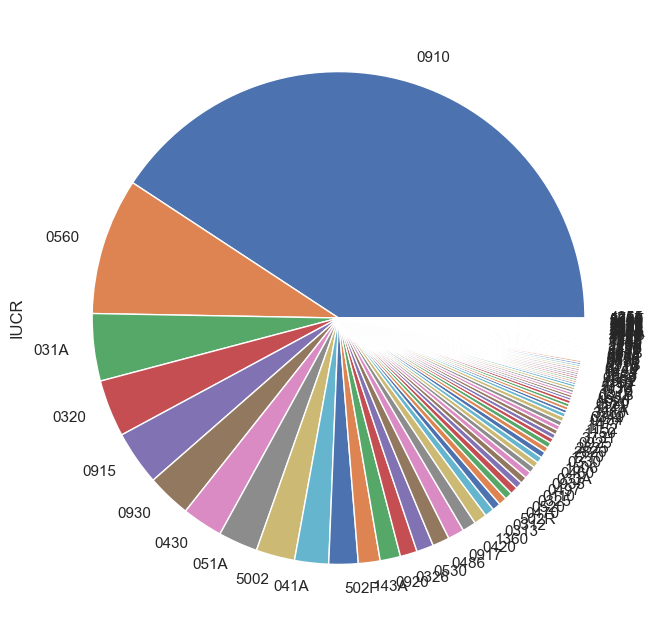

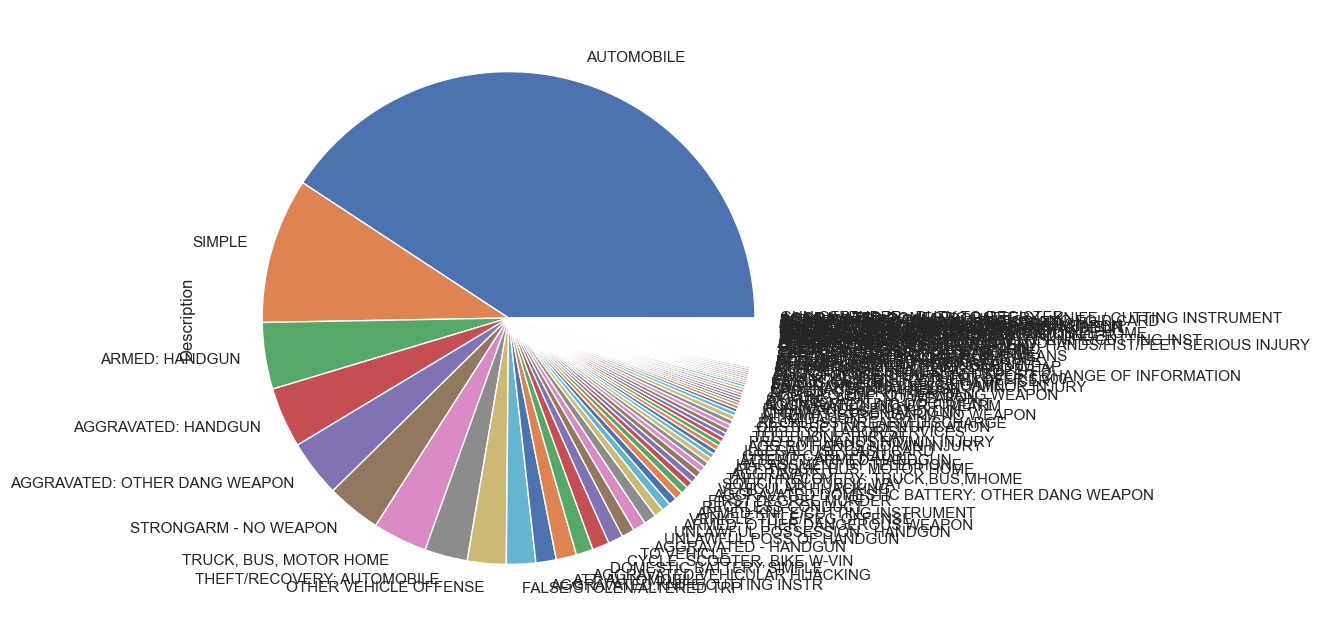

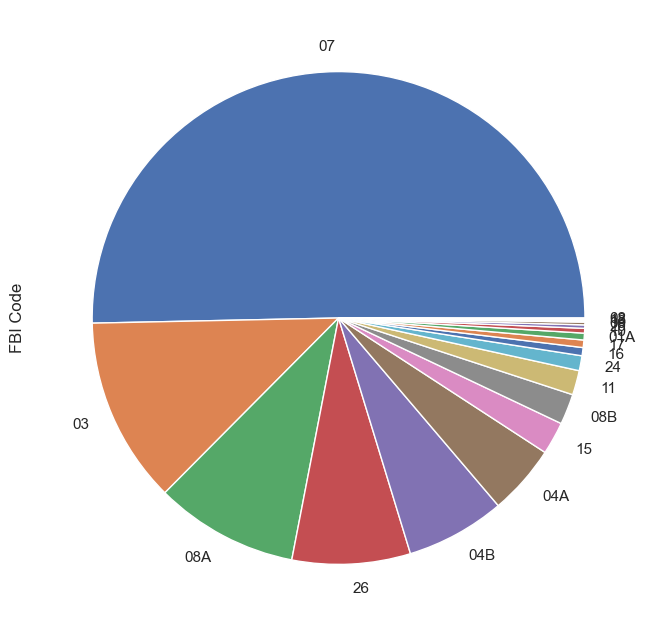

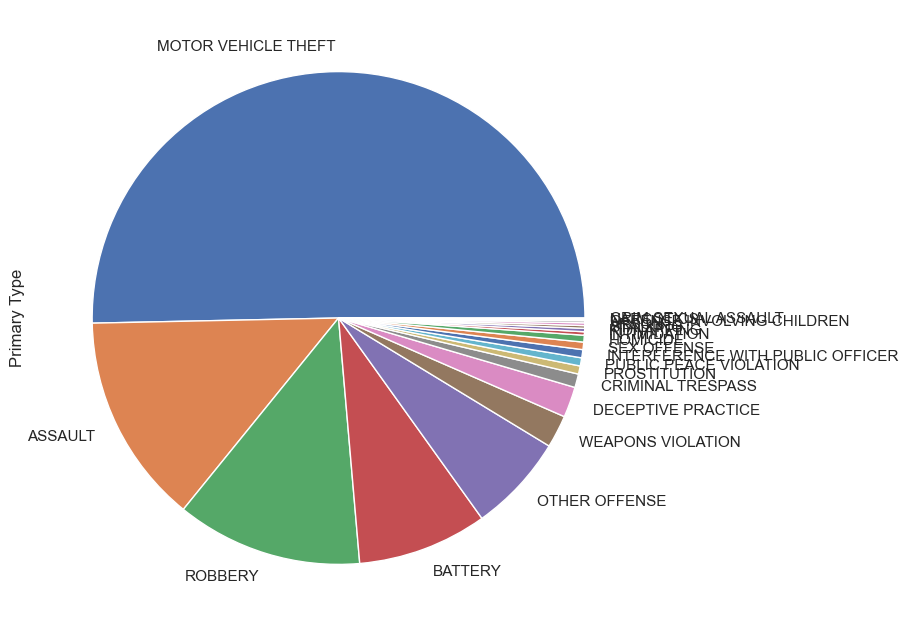

Plot for Cluster: 1


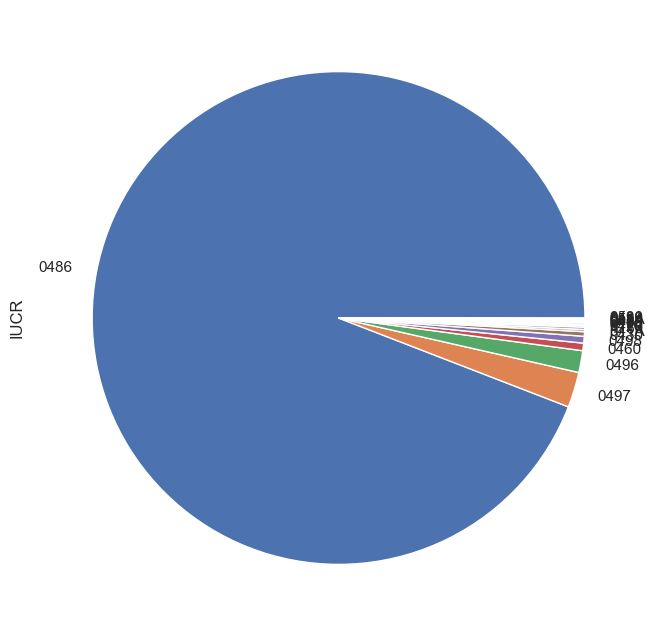

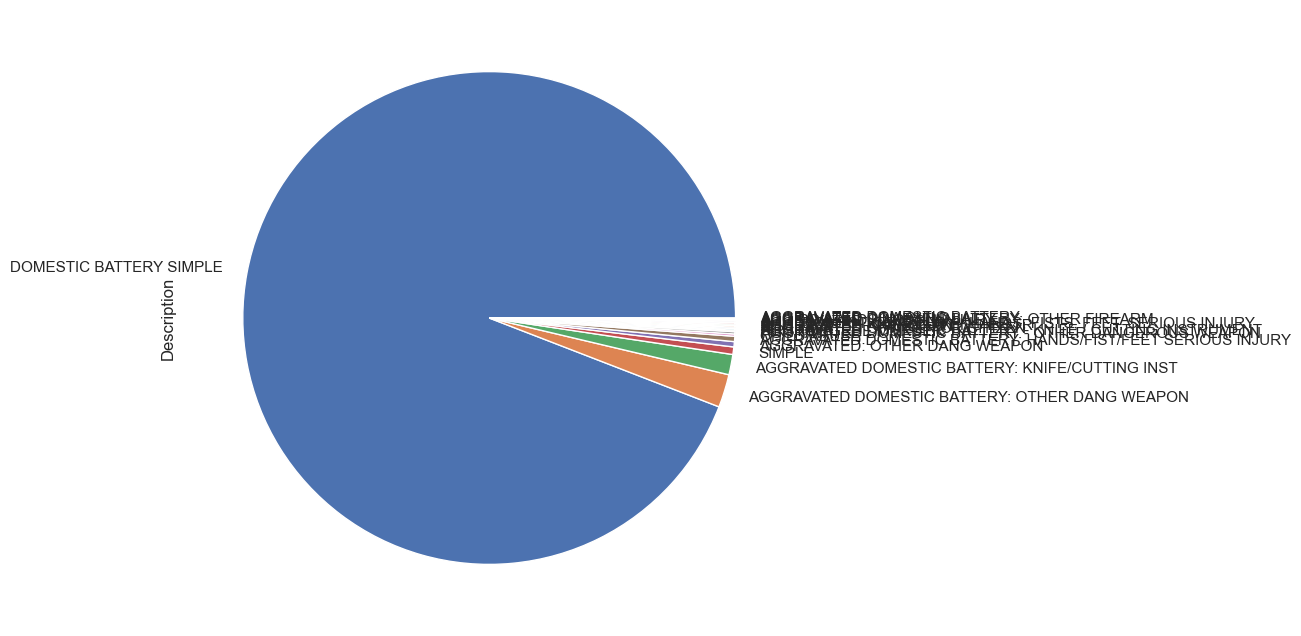

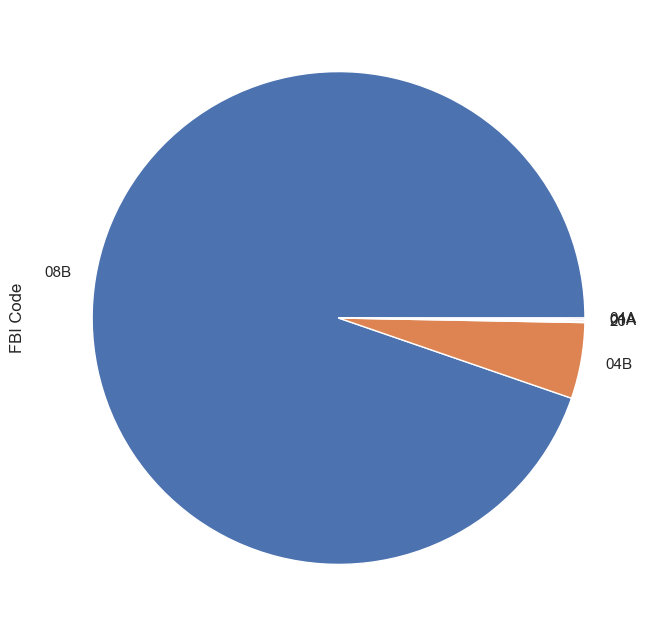

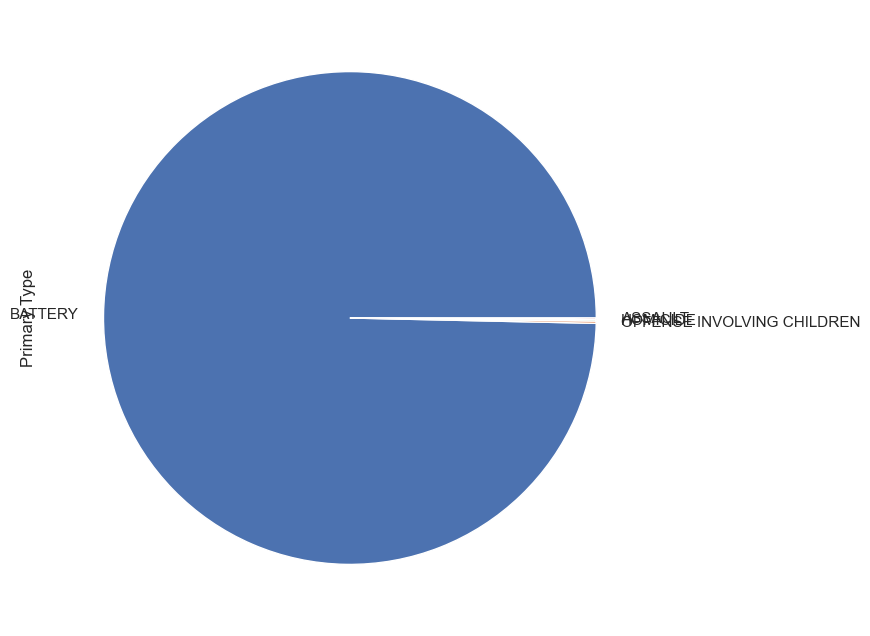

Plot for Cluster: 2


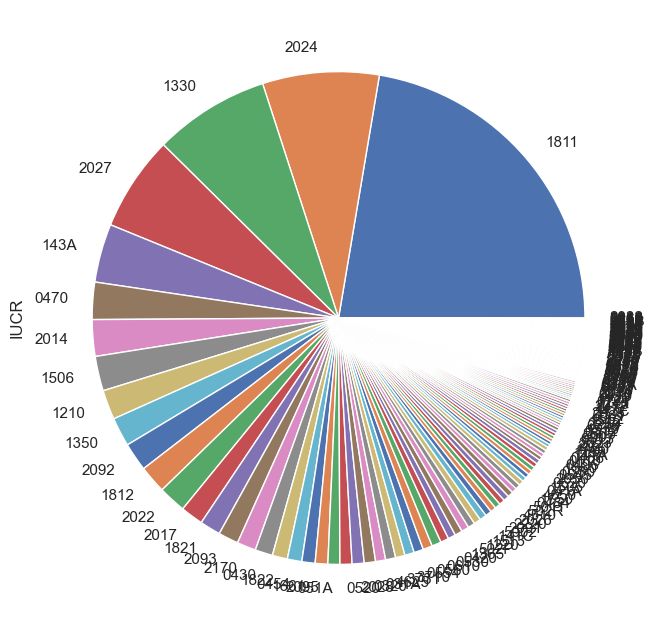

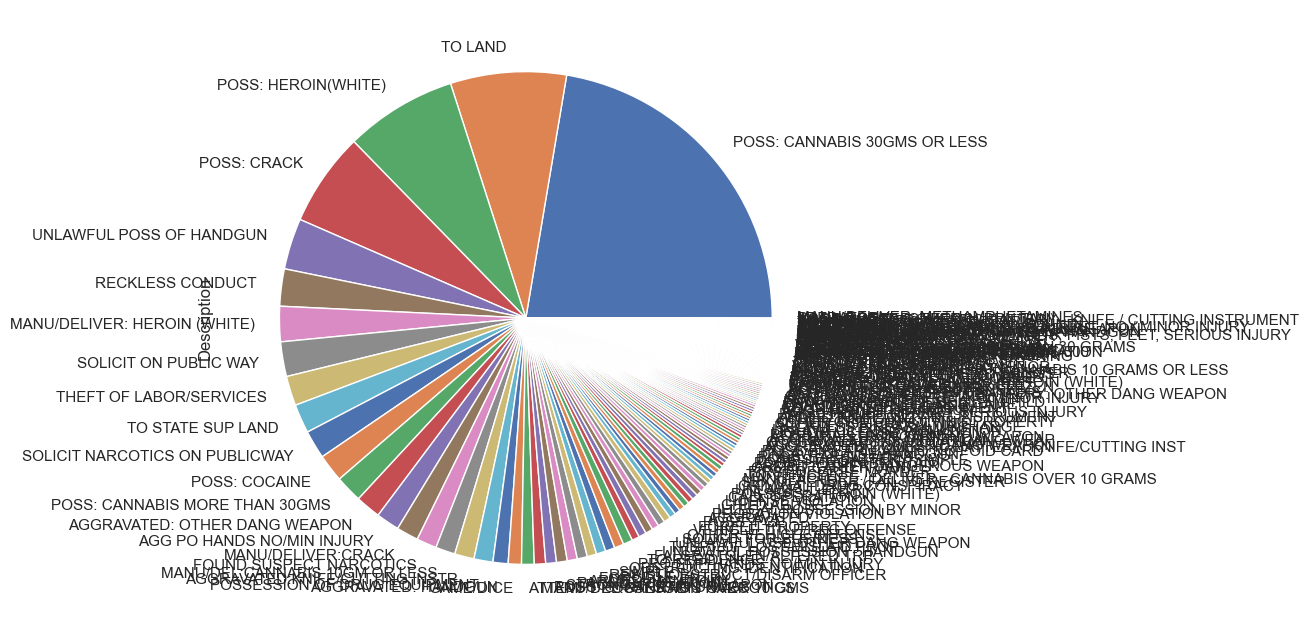

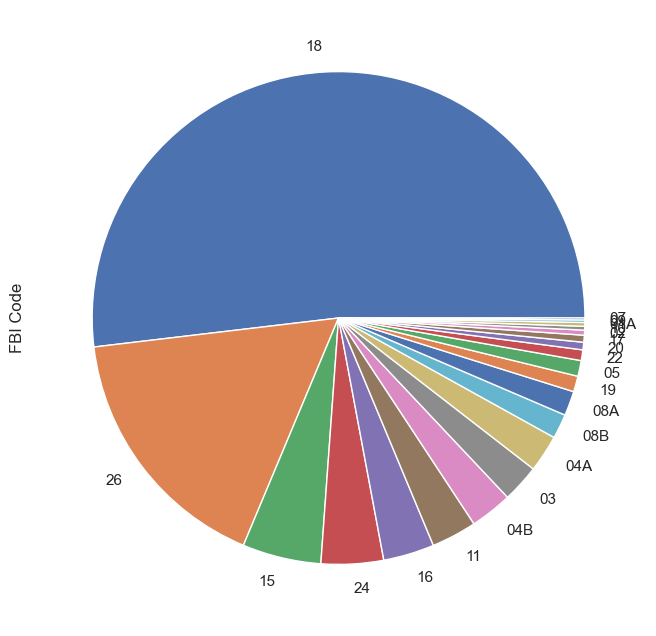

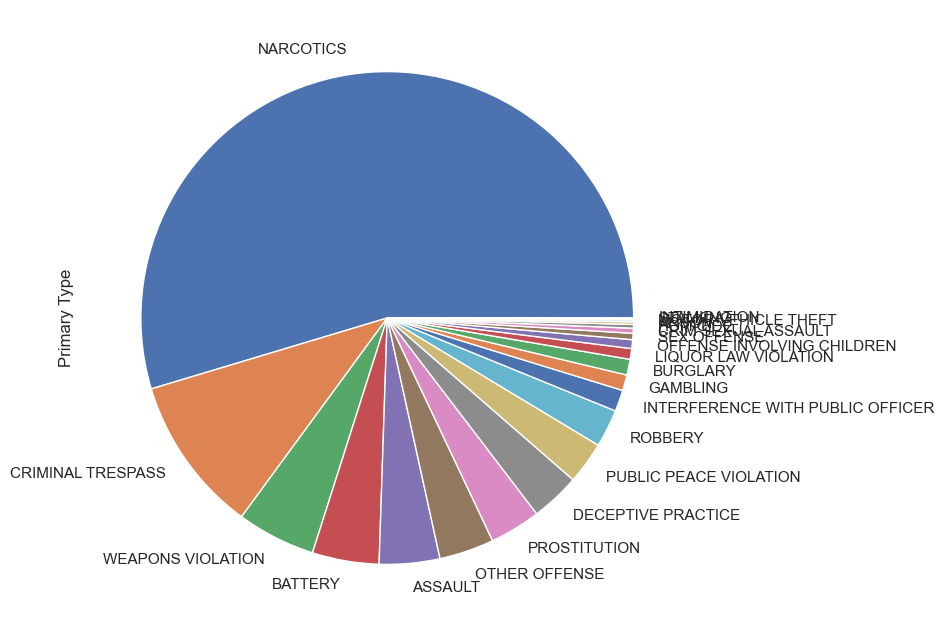

Plot for Cluster: 3


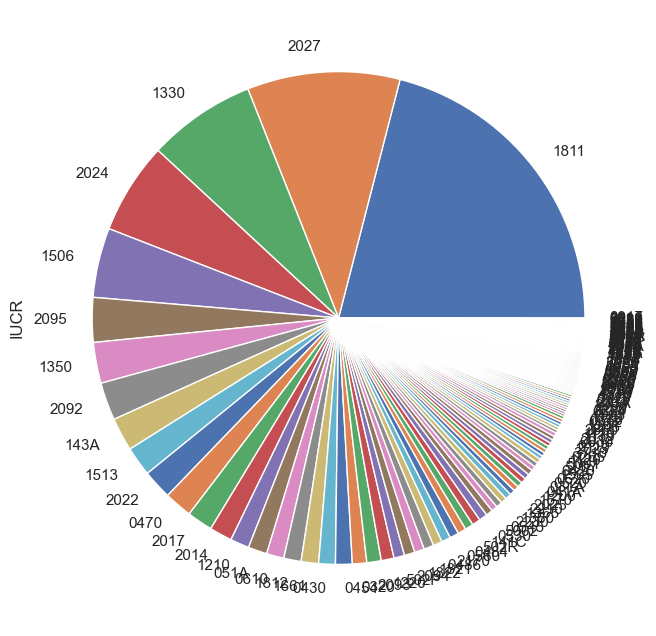

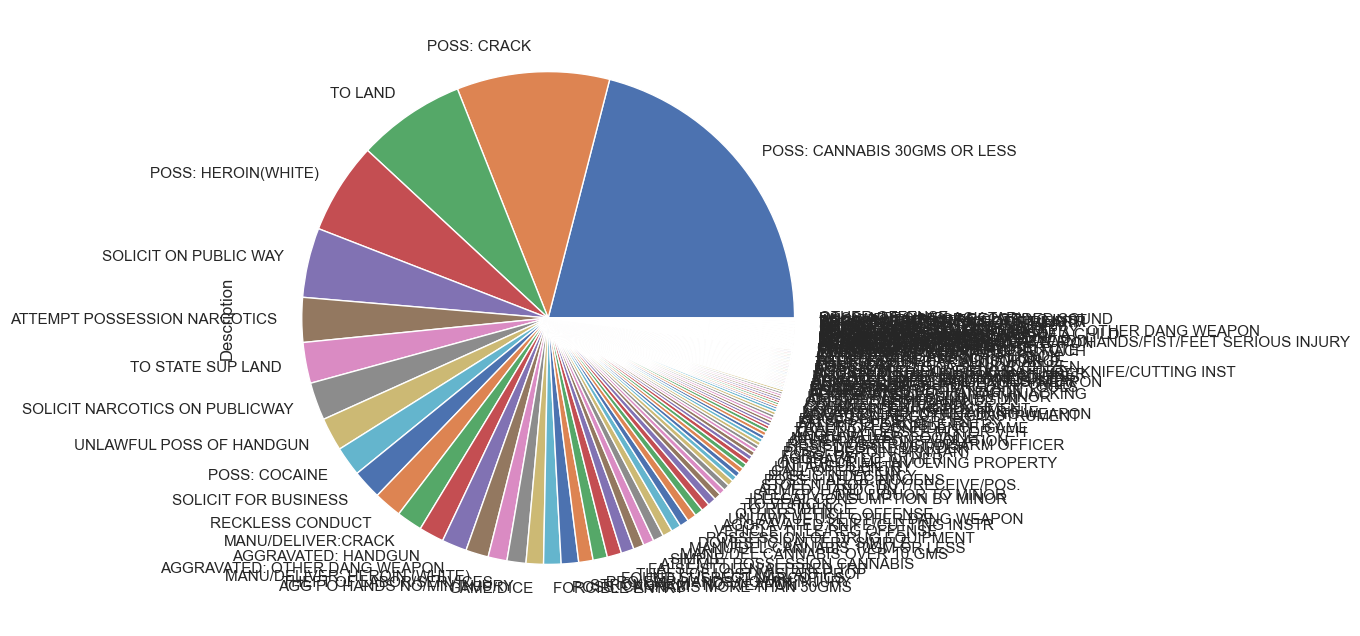

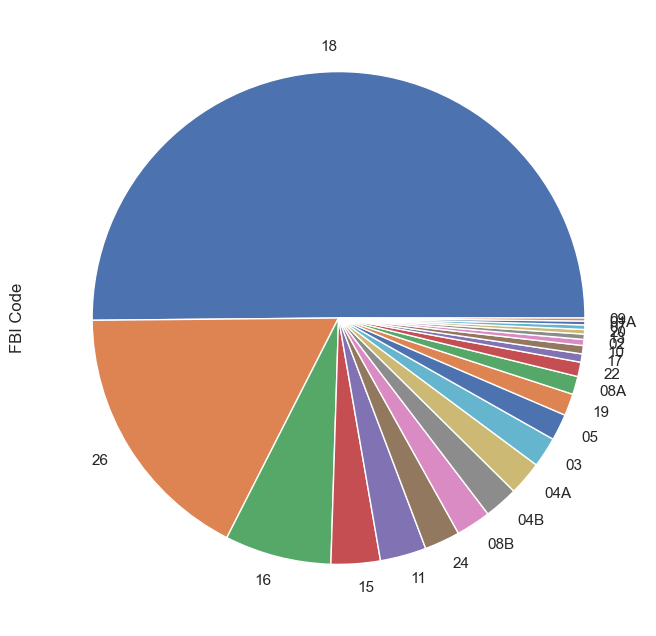

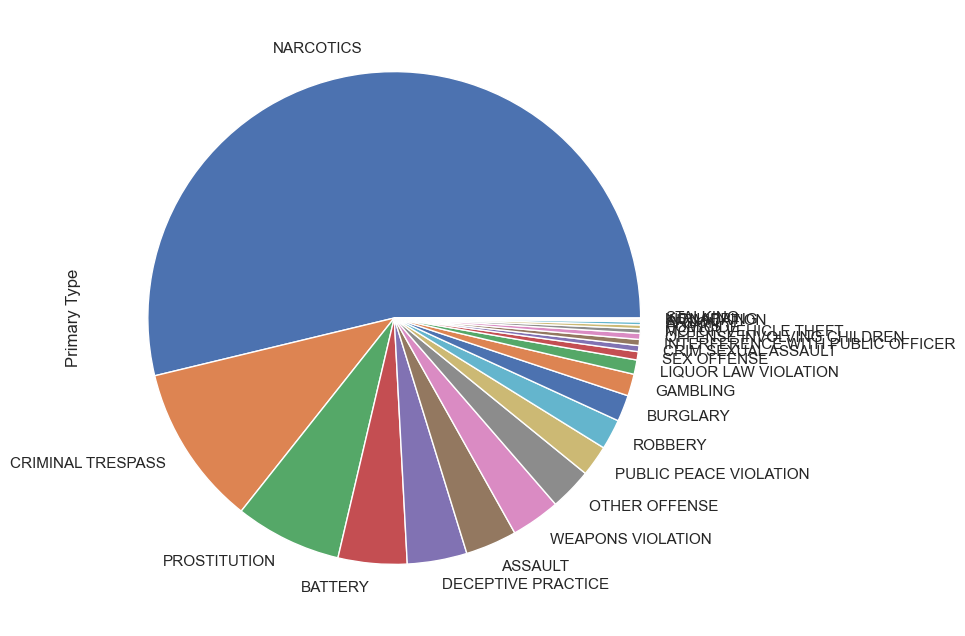

Plot for Cluster: 4


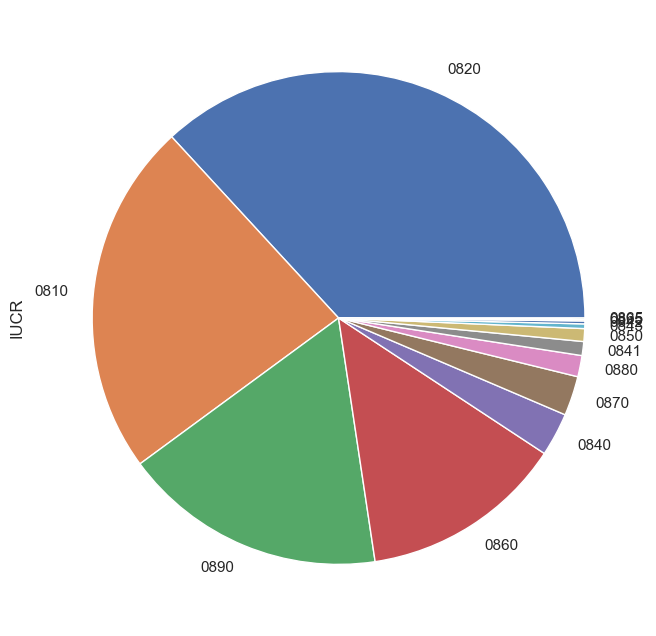

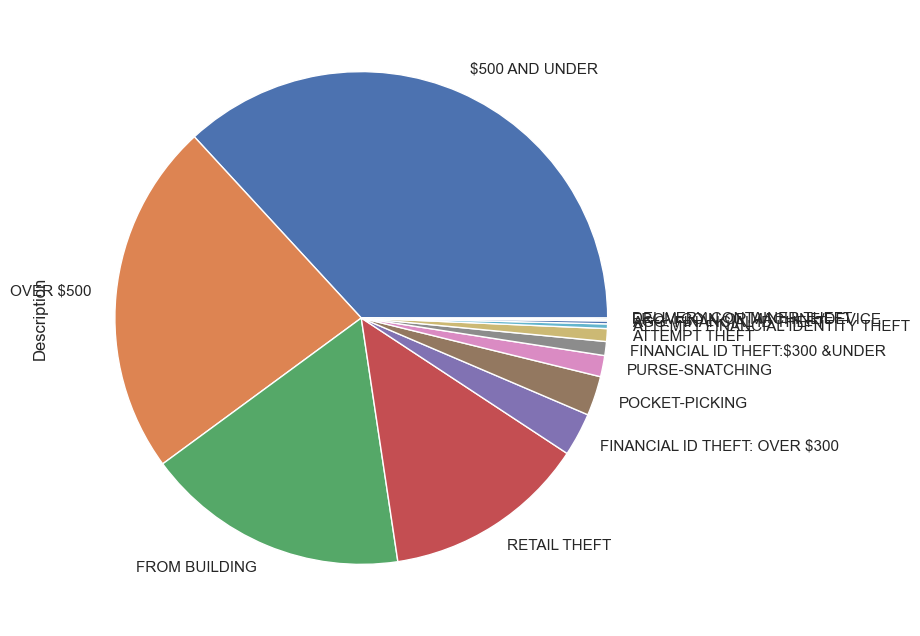

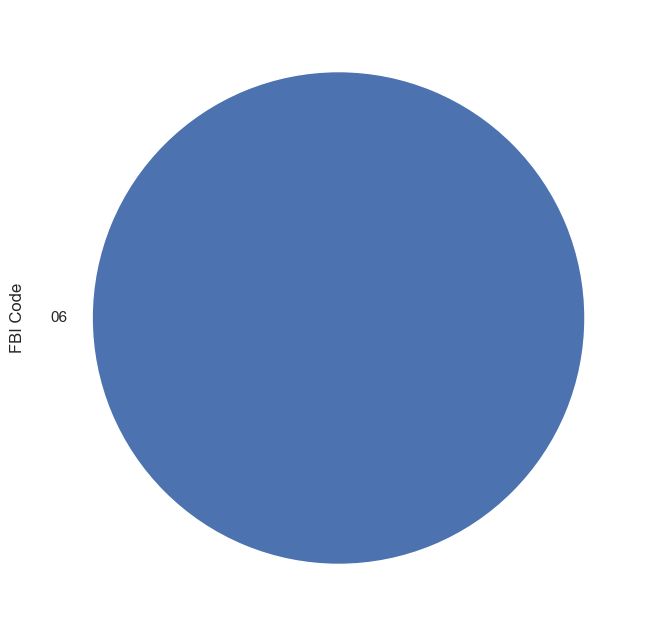

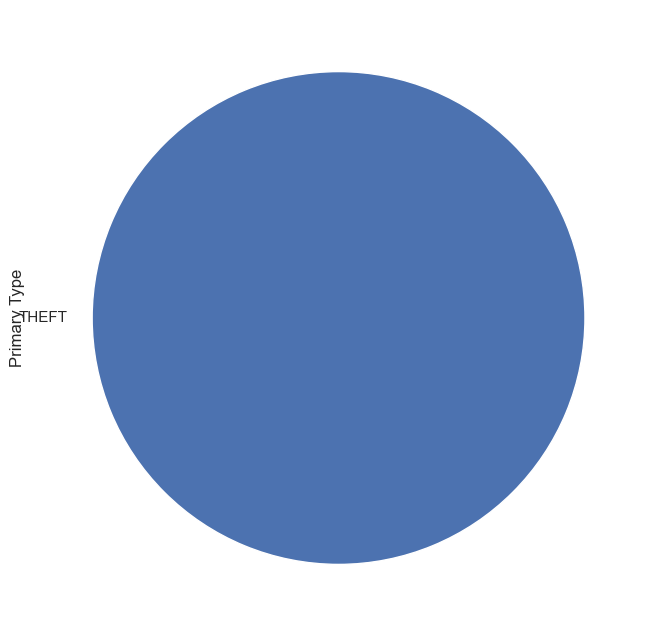

Plot for Cluster: 5


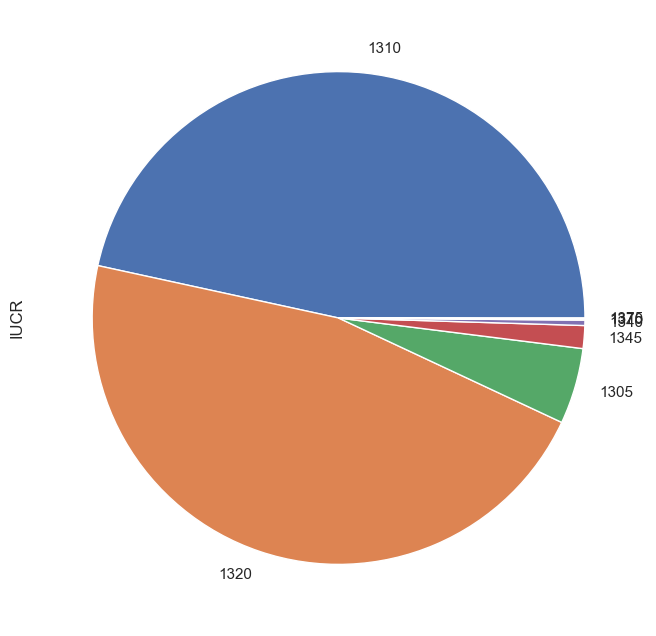

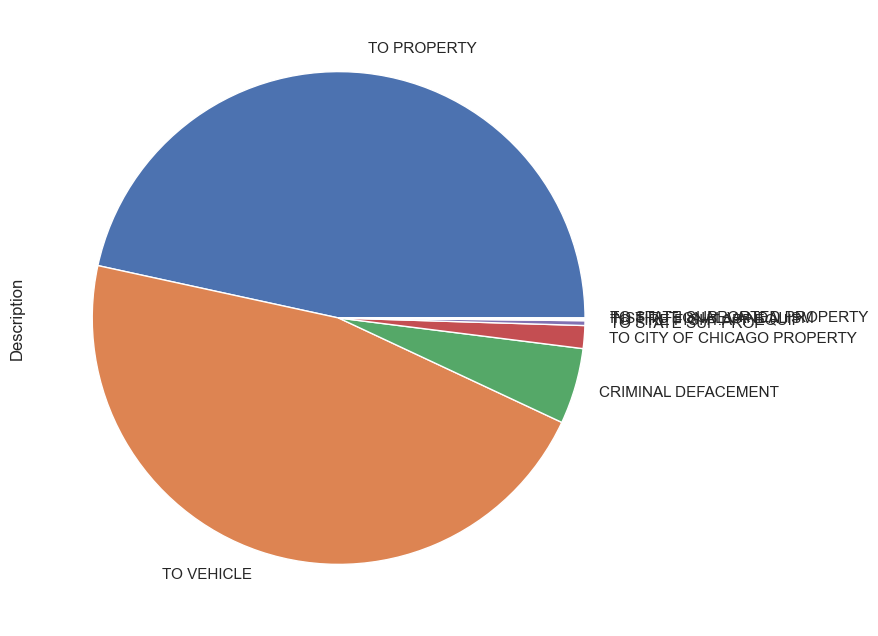

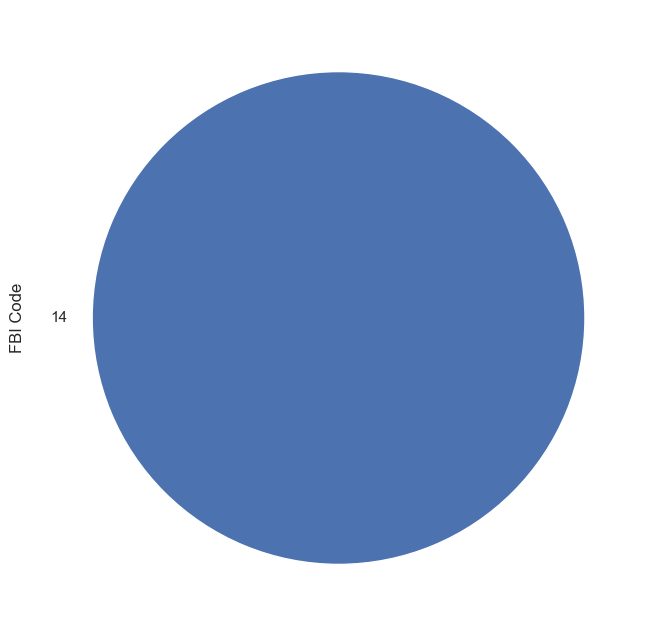

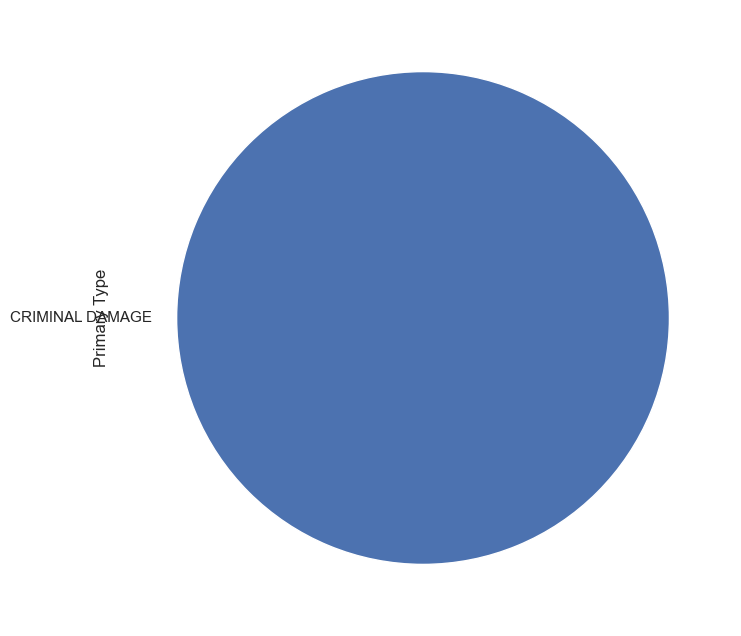

Plot for Cluster: 6


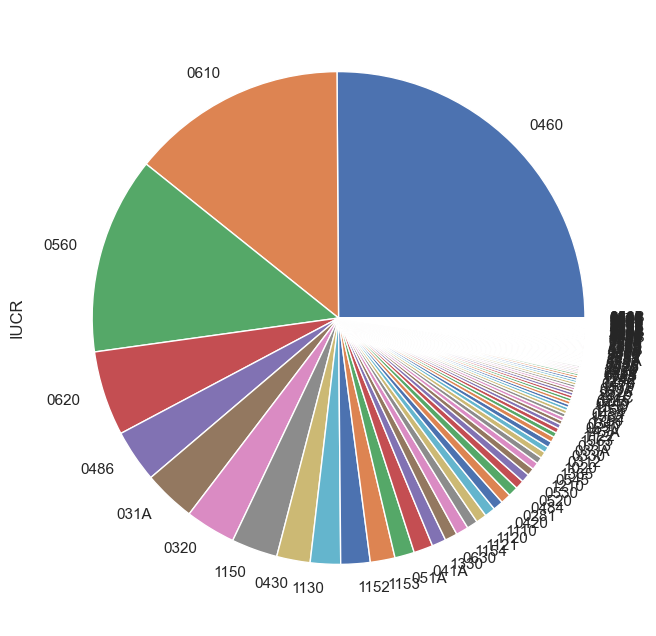

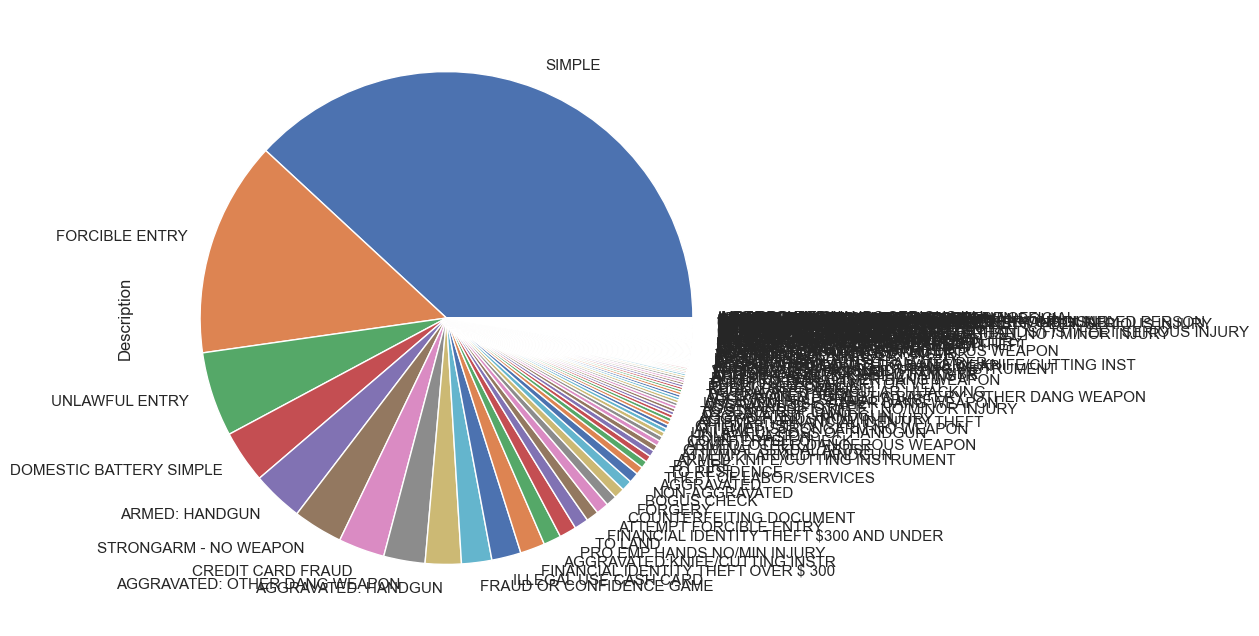

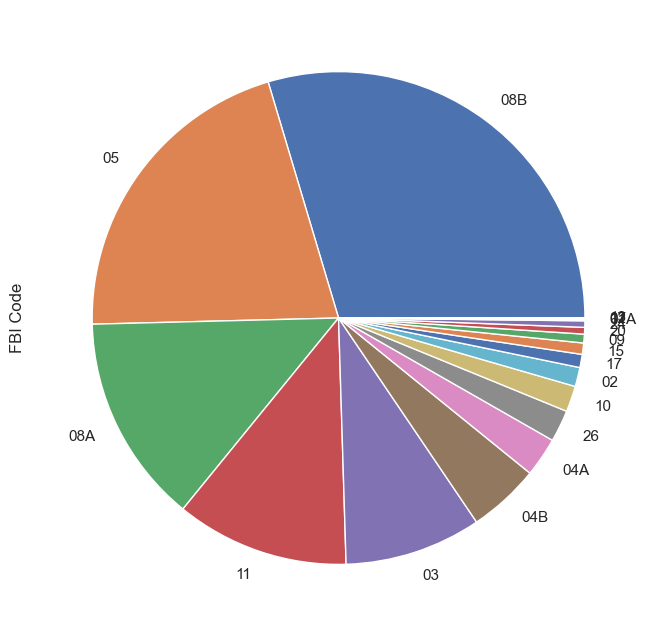

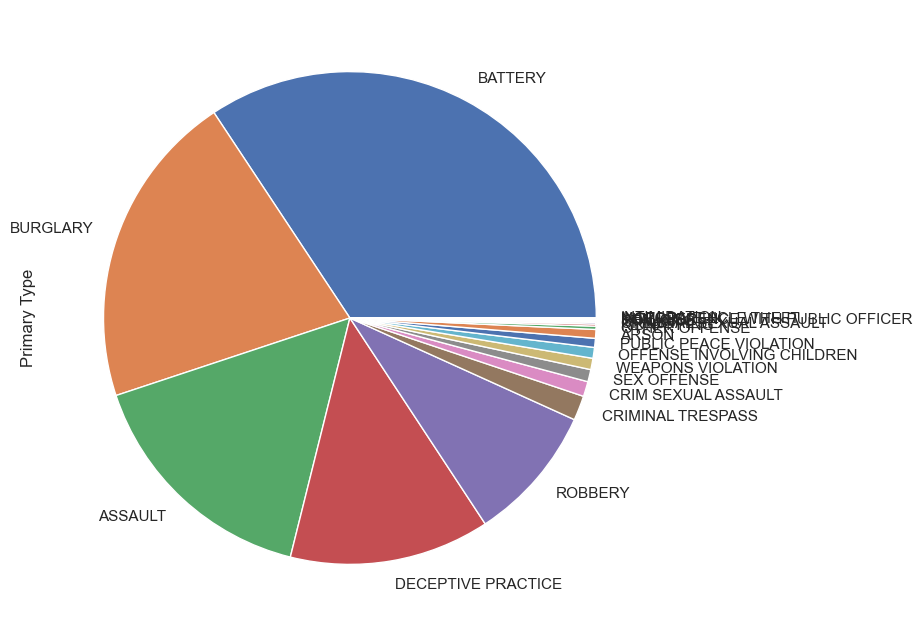

Plot for Cluster: 7


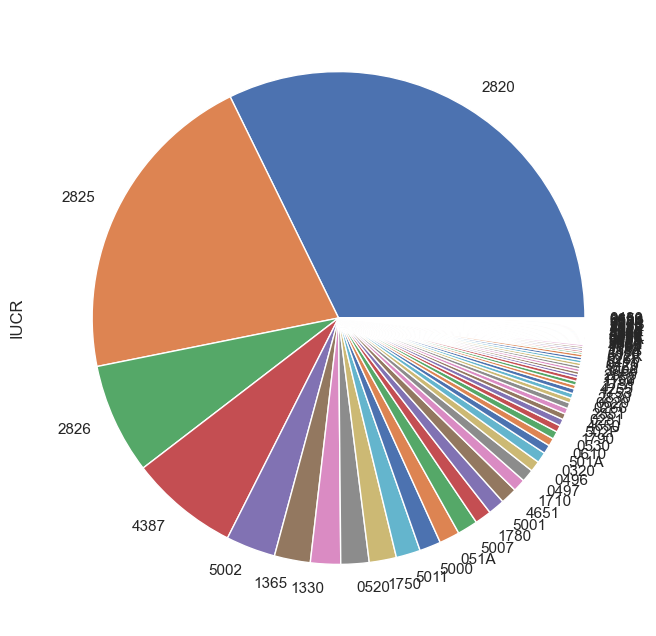

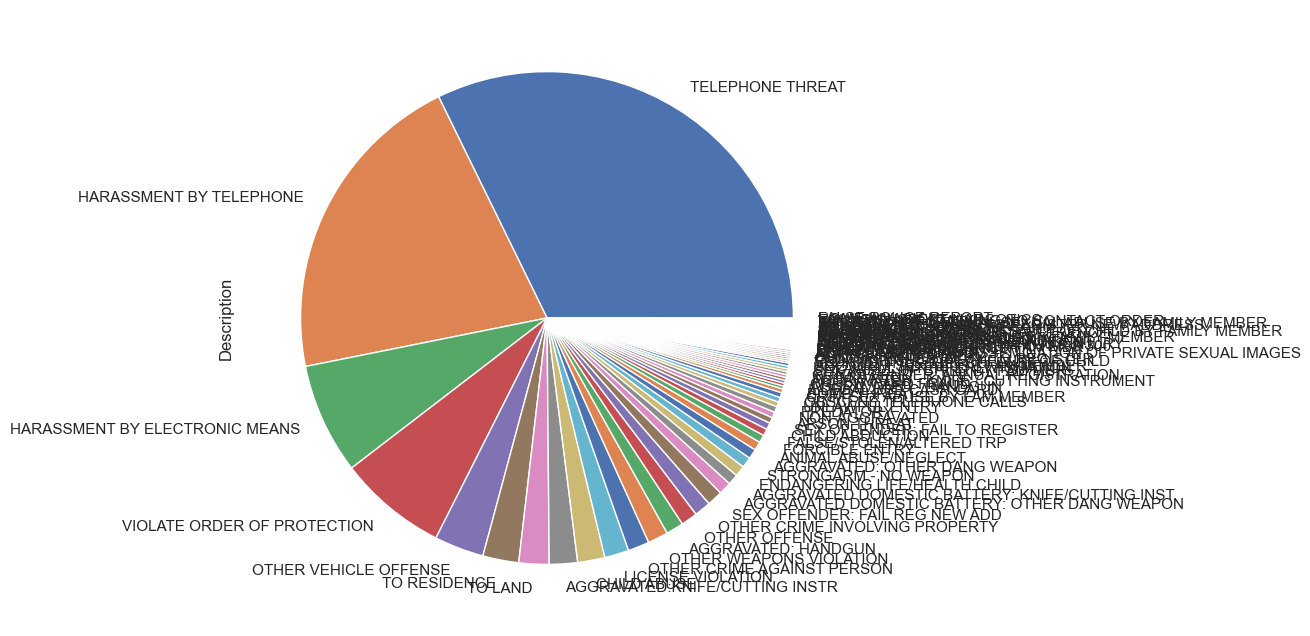

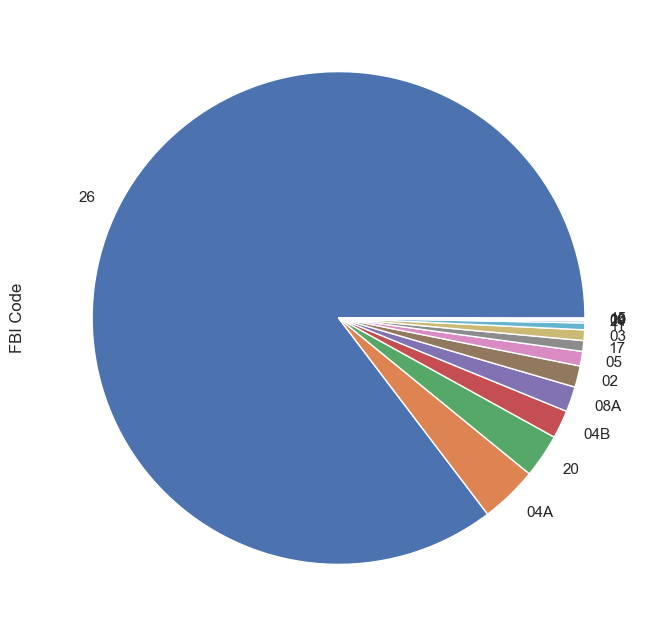

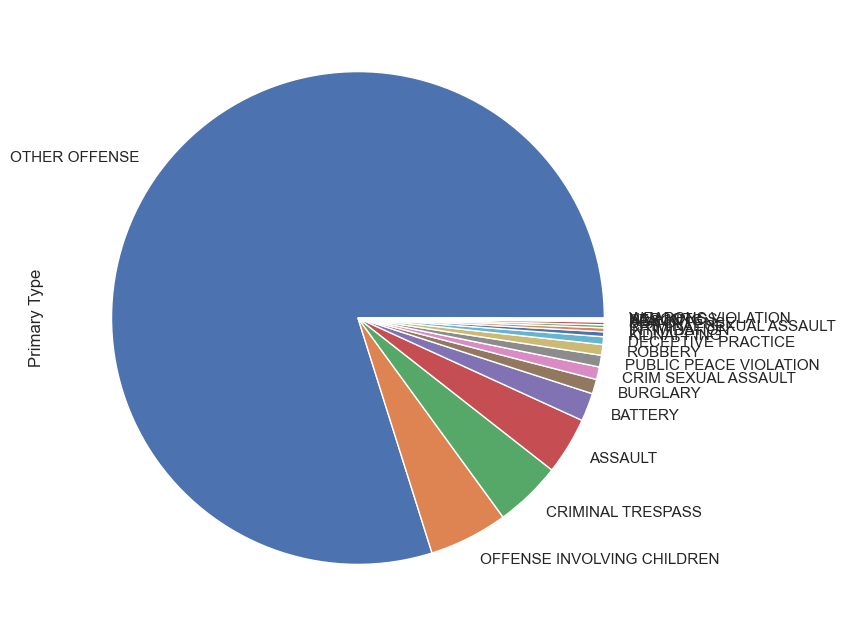

In [40]:
# Plot btw Spectral Clusters VS Relevant Features

high_NMI = ['IUCR', 'Description','FBI Code','Primary Type' ]
for cluster in set(spectral_clusters):
    print(f'Plot for Cluster:', cluster)
    cls = data25[cluster == spectral_clusters]
    for feature in high_NMI:
        cls[feature].value_counts().plot(kind='pie')
        plt.show()